In [1]:
#!pip install -r requirements.txt

In [110]:
# !pip freeze > requirements_new.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:.4f}'.format

<font color='red'> Erikas Švažas: 
Labai pravartu importuoti papildomų extensions kaip nb_black (automatinis PEP8 formatavimas)
```
%load_ext nb_black
```
</font>

<h1>Pirma dalis

a. Ką reiškia skirtingi duomenų laukai? Iš kokių atributų sudaryti duomenys?

<font color='red'> Erikas Švažas: 

Teisingai jei norima pirma atsisiųsti failą! Paprastesnė alternatyva tiesiog nusiskaityti iš remote: 
````
pd.read_csv(
    "https://www.registrucentras.lt/aduomenys/?byla=JAR_FA_RODIKLIAI_BLNS_2020.csv"
)
````
</font>

In [3]:
attr_def_blns = pd.read_excel('JAR_FA_RODIKLIAI_BLNS_STR.xlsx', header = 1)
attr_def_plna = pd.read_excel('JAR_FA_RODIKLIAI_PLNA_STR.xlsx', header = 1)

In [4]:
# atributų apibrėžimas (balansas)
attr_def_blns

,Žymėjimas,Tipas,Atributo aprašymas
0,obj_kodas,decimal,juridinio asmens kodas Juridinių asmenų registre
1,obj_pav,string,juridinio asmens pavadinimas (individualių įmo...
2,form_kodas,decimal,juridinio asmens formos kodas
3,form_pav,string,juridinio asmens formos pavadinimas
4,stat_statusas,decimal,juridinio asmens teisinio statuso kodas
5,stat_pav,string,juridinio asmens teisinio statuso pavadinimas
6,template_id,decimal,ataskaitos rūšies kodas
7,template_name,string,ataskaitos rūšies pavadinimas
8,standard_id,decimal,FA dokumentų rinkinio kodas
9,standard_name,string,FA dokumentų rinkinio tipas


In [5]:
# atributų apibrėžimas (pelnas-nuostolis)
attr_def_plna

,Žymėjimas,Tipas,Atributo aprašymas
0,obj_kodas,decimal,juridinio asmens kodas Juridinių asmenų registre
1,obj_pav,string,juridinio asmens pavadinimas (individualių įmo...
2,form_kodas,decimal,juridinio asmens formos kodas
3,form_pav,string,juridinio asmens formos pavadinimas
4,stat_statusas,decimal,juridinio asmens teisinio statuso kodas
5,stat_pav,string,juridinio asmens teisinio statuso pavadinimas
6,template_id,decimal,ataskaitos rūšies kodas
7,template_name,string,ataskaitos rūšies pavadinimas
8,standard_id,decimal,FA dokumentų rinkinio kodas
9,standard_name,string,FA dokumentų rinkinio tipas


b. Kiek reikšmių ir požymių turi kiekvienas iš dokumentų?

ats:  
2020 balanso failas turi 106318 reikšmes ir 18 požymių (įskaitant indexą)  
2021 balanso faials turi 120850 reikšmes ir 18 požymių (įskaitant indexą)  
2020 pelno-nuostolių failas turi 96616 reikšmes ir 17 požymių (įskaitant indexą)  
2021 pelno-nuostolių failas turi 110227 reikšmes ir 17 požymių (įskaitant indexą) 

In [6]:
df_blns_2020 = pd.read_csv('JAR_FA_RODIKLIAI_BLNS_2020.csv')
df_blns_2021 = pd.read_csv('JAR_FA_RODIKLIAI_BLNS_2021.csv')
df_plna_2020 = pd.read_csv('JAR_FA_RODIKLIAI_PLNA_2020.csv')
df_plna_2021 = pd.read_csv('JAR_FA_RODIKLIAI_PLNA_2021.csv')

In [7]:
df_blns_2020.shape

(106318, 18)

In [8]:
df_blns_2021.shape

(120850, 18)

In [9]:
df_plna_2020.shape

(96616, 17)

In [10]:
df_plna_2021.shape

(110227, 17)

c. Kokio duomenų tipo yra kiekvienas iš požymių? Ar duomenų tipai tarp
atitinkamų lentelių iš 2020 ir 2021 metų sutampa?

ats:  
taip, sutampa.

In [11]:
df_blns_2020.dtypes

obj_kodas                         int64
obj_pav                          object
form_kodas                        int64
form_pav                         object
stat_statusas                     int64
stat_pav                         object
template_id                      object
template_name                    object
standard_id                      object
standard_name                    object
laikotarpis_nuo                  object
laikotarpis_iki                  object
reg_date                         object
nuosavas_kapitalas              float64
mok_sumos_ir_isipareigojimai    float64
ilgalaikis_turtas               float64
trumpalaikis_turtas             float64
formavimo_data                   object
dtype: object

In [12]:
df_blns_2021.dtypes

obj_kodas                         int64
obj_pav                          object
form_kodas                        int64
form_pav                         object
stat_statusas                     int64
stat_pav                         object
template_id                      object
template_name                    object
standard_id                      object
standard_name                    object
laikotarpis_nuo                  object
laikotarpis_iki                  object
reg_date                         object
nuosavas_kapitalas              float64
mok_sumos_ir_isipareigojimai    float64
ilgalaikis_turtas               float64
trumpalaikis_turtas             float64
formavimo_data                   object
dtype: object

In [13]:
df_plna_2020.dtypes

obj_kodas                       int64
obj_pav                        object
form_kodas                      int64
form_pav                       object
stat_statusas                   int64
stat_pav                       object
template_id                    object
template_name                  object
standard_id                    object
standard_name                  object
laikotarpis_nuo                object
laikotarpis_iki                object
reg_date                       object
pelnas_pries_apmokestinima    float64
grynasis_pelnas               float64
pardavimo_pajamos             float64
formavimo_data                 object
dtype: object

In [14]:
df_plna_2021.dtypes

obj_kodas                       int64
obj_pav                        object
form_kodas                      int64
form_pav                       object
stat_statusas                   int64
stat_pav                       object
template_id                    object
template_name                  object
standard_id                    object
standard_name                  object
laikotarpis_nuo                object
laikotarpis_iki                object
reg_date                       object
pelnas_pries_apmokestinima    float64
grynasis_pelnas               float64
pardavimo_pajamos             float64
formavimo_data                 object
dtype: object

d. Paaiškinkite kas yra object duomenų tipas ir kuo jis skiriasi nuo string
duomenų tipo.

ats:  
Automatiškai Pandas priskiriamas duomenų tipas visoms reikšmėms turinčioms teksto. Object duomenų tipas gali įtraukti ne tik strings'us, bet ir kitus duomenų tipus, kurių Pandas nepavyko suprasti. Kai stulpelis turi priskirtą Object duomenų tipą, tai nereiškia, kad visos reikšmės privalo būti strings, reikšmės gali būti ir skaičiai, arba net string, int, float mišinys. Object skiriasi nuo string tuo, kad jeigu stulpelis turi Object dtype, negalima iškart jam taikyti string operacijų, pirmiausiai reikės nurodyti norimą duomenų tipą atskirai.

<font color='red'> Erikas Švažas: 
Super paaiškinmas!
</font>

e. Kuri lentelė turi daugiausiai nežinomų verčių? Kuris požymis išsiskiria
nežinomų verčių skaičiumi?

ats:  
Daugiausiai nežinomų reikšmių turi pelno-nuostolių 2021 metų lentelė. Labiausiai pagal nežinomų reikšmių skaičių išsiskiria pelnas_pries_apmokestinima požymis

<font color='red'> Erikas Švažas: 
šauniai panaudotos *Pandas* intrinsic fcijos. Be aware apie open-source paketus (pav [šis](https://github.com/ResidentMario/missingno)) skirtus tokiom užduotim spręsti.
</font>

In [15]:
def nan_counter(df):
    nans = df.isna().sum().sum()
    return (f'Table has {nans}')

In [16]:
nan_counter(df_blns_2020)

'Table has 17013'

In [17]:
nan_counter(df_blns_2021)

'Table has 24187'

In [18]:
nan_counter(df_plna_2020)

'Table has 47606'

In [19]:
nan_counter(df_plna_2021)

'Table has 55858'

In [20]:
df_plna_2021.isna().sum().nlargest(1)

pelnas_pries_apmokestinima    34755
dtype: int64

f. Ar kažkuri lentelė turi pasikartojančių duomenų?  

ats:  
ne

In [21]:
df_blns_2020.duplicated().value_counts()

False    106318
dtype: int64

In [22]:
df_blns_2021.duplicated().value_counts()

False    120850
dtype: int64

In [23]:
df_plna_2020.duplicated().value_counts()

False    96616
dtype: int64

In [24]:
df_plna_2021.duplicated().value_counts()

False    110227
dtype: int64

<font color='red'> Erikas Švažas: 
Alternatyva:
```
df_plna_2021[df_plna_2021.duplicated()].shape
```
</font>

i. Kokia stulpelių aibė vienareikšmiškai identifikuoja kiekvienos lentelės
eilutę?  

ats:  
obj_kodas + laikotarpis_nuo

In [25]:
df_blns_2020['unikalus_id'] = df_blns_2020['obj_kodas'].map(str, na_action=None) + \
                              '_' + \
                              df_blns_2020['laikotarpis_nuo'].map(str, na_action=None)
len(pd.unique(df_blns_2020['unikalus_id']))
#naujai sukurto unikalaus id skirtingų reikšmių skaičius sutampa su eilučių skaičiumi.

106318

In [26]:
df_blns_2021['unikalus_id'] = df_blns_2021['obj_kodas'].map(str, na_action=None) + \
                              '_' + \
                              df_blns_2021['laikotarpis_nuo'].map(str, na_action=None)
len(pd.unique(df_blns_2021['unikalus_id']))
#naujai sukurto unikalaus id skirtingų reikšmių skaičius sutampa su eilučių skaičiumi.

120850

In [27]:
df_plna_2020['unikalus_id'] = df_plna_2020['obj_kodas'].map(str, na_action=None) + \
                              '_' + \
                              df_plna_2020['laikotarpis_nuo'].map(str, na_action=None)
len(pd.unique(df_plna_2020['unikalus_id']))
#naujai sukurto unikalaus id skirtingų reikšmių skaičius sutampa su eilučių skaičiumi.

96616

In [28]:
df_plna_2021['unikalus_id'] = df_plna_2021['obj_kodas'].map(str, na_action=None) + \
                              '_' + \
                              df_plna_2021['laikotarpis_nuo'].map(str, na_action=None)
len(pd.unique(df_plna_2021['unikalus_id']))
#naujai sukurto unikalaus id skirtingų reikšmių skaičius sutampa su eilučių skaičiumi.

110227

<h1>Antra dalis

In [29]:
df_blns_2020['metai'] = '2020'
df_blns_2021['metai'] = '2021'
df_plna_2020['metai'] = '2020'
df_plna_2021['metai'] = '2021'

In [30]:
# susikuriu bendrą balanso dataset'ą ir bendrą pelno-nuostolio dataset'ą
df_blns_comb = pd.concat([df_blns_2020, df_blns_2021])
df_plna_comb = pd.concat([df_plna_2020, df_plna_2021])

4. Keletas juridinių asmenų pavadinimų yra tiesiogiai susiję su “Thermo Fisher”
bendrove. Raskite pilnus šių bendrovių pavadinimus.

<font color="red"> Erikas Švažas

Ateityje gali praversti .str.contains(case=?) argumentas

</font>

In [31]:
mask = df_blns_comb['obj_pav'].str.contains('Thermo Fisher')
df_blns_comb[mask]['obj_pav'].tolist()

['UAB "Thermo Fisher Scientific Vector Holdings"',
 'UAB "Thermo Fisher Scientific Baltics"',
 'UAB "Thermo Fisher Scientific Vector Senior Holdings I"',
 'UAB "Thermo Fisher Scientific Vector Senior Holdings II"',
 'UAB "Thermo Fisher Scientific Vector Senior Holdings II"',
 'UAB "Thermo Fisher Scientific Vector Senior Holdings I"',
 'UAB "Thermo Fisher Scientific Baltics"',
 'UAB "Thermo Fisher Scientific Vector Holdings"']

In [32]:
mask = df_plna_comb['obj_pav'].str.contains('Thermo Fisher')
df_plna_comb[mask]['obj_pav'].tolist()

['UAB "Thermo Fisher Scientific Vector Senior Holdings I"',
 'UAB "Thermo Fisher Scientific Vector Holdings"',
 'UAB "Thermo Fisher Scientific Vector Senior Holdings II"',
 'UAB "Thermo Fisher Scientific Baltics"',
 'UAB "Thermo Fisher Scientific Baltics"',
 'UAB "Thermo Fisher Scientific Vector Senior Holdings I"',
 'UAB "Thermo Fisher Scientific Vector Senior Holdings II"',
 'UAB "Thermo Fisher Scientific Vector Holdings"']

5. Apsimeskime, kad atributas “form_pav” neegzistuoja. Iš likusių laukelių gaukite visas
UAB ir MB bendroves. Palyginkite rekonstrukcijos tikslumą su “form_pav” vertėmis -
kiek procentų verčių pavyko atkurti skirtingose duomenyse?  

ats:  
pavyko atkurti virš 99.4% balanso failams ir virš 99.3% pelno-nuostolio failams

In [33]:
pd.concat([df_blns_comb[df_blns_comb["obj_pav"].str.contains('Uždaroji akcinė bendrovė')],
           df_blns_comb[df_blns_comb["obj_pav"].str.contains('uždaroji akcinė bendrovė')],
           df_blns_comb[df_blns_comb["obj_pav"].str.contains('UAB')], 
           df_blns_comb[df_blns_comb["obj_pav"].str.contains('Uab')], 
           df_blns_comb[df_blns_comb["obj_pav"].str.contains('uab')],
           df_blns_comb[df_blns_comb["obj_pav"].str.contains('MB ')],
           df_blns_comb[df_blns_comb["obj_pav"].str.contains('mb ')],
           df_blns_comb[df_blns_comb["obj_pav"].str.contains('Mb ')],
           df_blns_comb[df_blns_comb["obj_pav"].str.contains(' MB')],
           df_blns_comb[df_blns_comb["obj_pav"].str.contains(' mb')],
           df_blns_comb[df_blns_comb["obj_pav"].str.contains(' Mb')],
           df_blns_comb[df_blns_comb["obj_pav"].str.contains('Mažoji bendrija')],
           df_blns_comb[df_blns_comb["obj_pav"].str.contains('mažoji bendrija')]
          ])

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data,unikalus_id,metai
2,304759186,"Uždaroji akcinė bendrovė ""Balsana LT""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2019-01-01,2019-12-31,2020-04-22,-20442.0000,93324.0000,2619.0000,69759.0000,2022-12-01,304759186_2019-01-01,2020
5,222022510,"Uždaroji akcinė bendrovė ""RUTONIS""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0028,"Labai mažų įmonių, taikančių išimtis, finansin...",BST022,BALANSAS (Trumpas),2016-01-01,2016-12-31,2020-06-19,2830.0000,1564.0000,164.0000,4230.0000,2022-12-01,222022510_2016-01-01,2020
12,300621953,"Uždaroji akcinė bendrovė ""Gamafondas""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST123,BALANSAS,2019-01-01,2019-12-31,2020-05-26,10068479.0000,6586089.0000,16136731.0000,516088.0000,2022-12-01,300621953_2019-01-01,2020
23,159966442,"Uždaroji akcinė bendrovė ""Romega""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),2019-01-01,2019-12-31,2020-03-04,1114866.0000,425705.0000,476457.0000,1056200.0000,2022-12-01,159966442_2019-01-01,2020
41,235894590,"Uždaroji akcinė bendrovė ""LAMINERA""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),2019-01-01,2019-12-31,2020-11-18,69969.0000,4015.0000,4037.0000,69947.0000,2022-12-01,235894590_2019-01-01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97495,304419066,"""Zamartis"" mažoji bendrija",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,2020-01-01,2020-12-31,2021-03-03,8366.0000,NaN,22478.0000,6240.0000,2022-12-01,304419066_2020-01-01,2021
97643,304965503,M. Špokausko mažoji bendrija,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,2020-01-01,2020-12-31,2021-03-17,11720.0000,NaN,9590.0000,2140.0000,2022-12-01,304965503_2020-01-01,2021
98003,304068941,"""Salvas"" mažoji bendrija",960,Mažoji bendrija,10,Išregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,2020-01-01,2020-12-31,2021-06-04,-1036.0000,NaN,0.0000,200.0000,2022-12-01,304068941_2020-01-01,2021
106326,232624020,"O. Ribakovienės mažoji bendrija ""Onutės šakotis""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,2020-01-01,2020-12-31,2021-03-22,-14161.0000,NaN,35083.0000,17234.0000,2022-12-01,232624020_2020-01-01,2021


In [34]:
df_blns_comb.query(''' form_pav in ['Uždaroji akcinė bendrovė', 'Mažoji bendrija'] ''').shape

(190979, 20)

In [35]:
189835/190979 * 100

99.40098125971966

<font color="red"> Erikas Švažas

Puikiai, kad pastebėjote jog gali būti tiek UAB, tiek ilgasis pavadinimas (Uždaroji akcinė bendrovė) str.contains() logiką. Alternatyvus splitas: per kabutes - prieš įmonės pavadinimą eina kabutės. Tuomet nereikėtų išvardinti visų opcijų.
</font>

In [36]:
pd.concat([df_plna_comb[df_plna_comb["obj_pav"].str.contains('Uždaroji akcinė bendrovė')],
           df_plna_comb[df_plna_comb["obj_pav"].str.contains('uždaroji akcinė bendrovė')],
           df_plna_comb[df_plna_comb["obj_pav"].str.contains('UAB')], 
           df_plna_comb[df_plna_comb["obj_pav"].str.contains('Uab')], 
           df_plna_comb[df_plna_comb["obj_pav"].str.contains('uab')],
           df_plna_comb[df_plna_comb["obj_pav"].str.contains('MB ')],
           df_plna_comb[df_plna_comb["obj_pav"].str.contains('mb ')],
           df_plna_comb[df_plna_comb["obj_pav"].str.contains('Mb ')],
           df_plna_comb[df_plna_comb["obj_pav"].str.contains(' MB')],
           df_plna_comb[df_plna_comb["obj_pav"].str.contains(' mb')],
           df_plna_comb[df_plna_comb["obj_pav"].str.contains(' Mb')],
           df_plna_comb[df_plna_comb["obj_pav"].str.contains('Mažoji bendrija')],
           df_plna_comb[df_plna_comb["obj_pav"].str.contains('mažoji bendrija')]
          ])

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data,unikalus_id,metai
3,123403470,"Uždaroji akcinė bendrovė ""POŽEMINĖS JUNGTYS""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2019-01-01,2019-12-31,2020-06-01,421676.0000,358974.0000,1994591.0000,2022-12-01,123403470_2019-01-01,2020
4,124586163,"Uždaroji akcinė bendrovė ""Mantigus""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),2019-01-01,2019-12-31,2020-05-20,NaN,7875.0000,63052.0000,2022-12-01,124586163_2019-01-01,2020
27,249910930,"Uždaroji akcinė bendrovė ""Traidenis""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2019-01-01,2019-12-31,2020-06-11,81174.0000,75573.0000,4078107.0000,2022-12-01,249910930_2019-01-01,2020
36,177131038,"Uždaroji akcinė bendrovė ""Marių žvejys""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2019-01-01,2019-12-31,2020-05-22,-68.0000,-68.0000,NaN,2022-12-01,177131038_2019-01-01,2020
49,270532150,"Uždaroji akcinė bendrovė ""Vigrima""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2019-01-01,2019-12-31,2020-04-20,1062.0000,71.0000,934154.0000,2022-12-01,270532150_2019-01-01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95955,305342053,Evelinos mažoji bendrija,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,IST118,PELNO (NUOSTOLIŲ) ATASKAITA (Neribotos civilin...,2020-01-01,2020-12-31,2021-03-09,11723.0000,11137.0000,50645.0000,2022-12-01,305342053_2020-01-01,2021
98727,305596443,Nerijaus Grubliausko mažoji bendrija,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,IST118,PELNO (NUOSTOLIŲ) ATASKAITA (Neribotos civilin...,2020-07-29,2020-12-31,2021-03-30,336.0000,336.0000,2782.0000,2022-12-01,305596443_2020-07-29,2021
100610,303121985,Petro Tiknevičiaus mažoji bendrija,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,IST118,PELNO (NUOSTOLIŲ) ATASKAITA (Neribotos civilin...,2020-01-01,2020-12-31,2021-02-10,0.0000,0.0000,0.0000,2022-12-01,303121985_2020-01-01,2021
105454,305412434,Arūno Liutkaus mažoji bendrija,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,IST118,PELNO (NUOSTOLIŲ) ATASKAITA (Neribotos civilin...,2020-01-02,2020-12-31,2021-07-19,6180.0000,6180.0000,8136.0000,2022-12-01,305412434_2020-01-02,2021


In [37]:
189823/190976 * 100

99.3962592158177

In [38]:
df_plna_comb.query(''' form_pav in ['Uždaroji akcinė bendrovė', 'Mažoji bendrija'] ''').shape

(190976, 19)

6. Apskaičiuoti vidutinias reikšmes “pelnas_pries_apmokestinima” ir
“nuosavas_kapitalas” laukų kiekvienai juridinio asmens formai (Uždaroji akcinė
bendrovė, Mažoji bendrija, etc.) už visą laikotarpį (2020 ir 2021 metai kartu).

In [39]:
df_plna_comb.groupby(['form_pav'])['pelnas_pries_apmokestinima'].mean().sort_values(ascending=False)

form_pav
Valstybės įmonė                             4190053.8148
Akcinė bendrovė                             2894379.1167
Komanditinė ūkinė bendrija                   329297.8571
Uždaroji akcinė bendrovė                     108121.5597
Žemės ūkio bendrovė                          106521.8961
Kooperatinė bendrovė                          46928.7250
Savivaldybės įmonė                            39780.8444
Biudžetinė įstaiga                            16242.0000
Individuali įmonė                             15008.3170
Mažoji bendrija                                7051.3261
Viešoji įstaiga                                5904.1304
Labdaros ir paramos fondas                      544.5789
Asociacija                                     -297.5732
Tikroji ūkinė bendrija                        -9874.1905
Užsienio juridinio asmens filialas         -4722950.8846
Lietuvos prekyb.,pramon. rūmų asociacija             NaN
Name: pelnas_pries_apmokestinima, dtype: float64

In [40]:
df_blns_comb.groupby(['form_pav'])['nuosavas_kapitalas'].mean().sort_values(ascending=False)

form_pav
Valstybės įmonė                            174869502.2414
Akcinė bendrovė                             41397551.5726
Savivaldybės įmonė                           3431537.4000
Užsienio juridinio asmens filialas           3368923.1875
Komanditinė ūkinė bendrija                   3251404.1649
Žemės ūkio bendrovė                          1607303.1634
Kooperatinė bendrovė                          677360.9075
Uždaroji akcinė bendrovė                      628816.0176
Tikroji ūkinė bendrija                        252825.9545
Biudžetinė įstaiga                            141074.0000
Individuali įmonė                             124624.5053
Lietuvos prekyb.,pramon. rūmų asociacija       64491.0000
Asociacija                                     36293.0271
Labdaros ir paramos fondas                     31248.6528
Viešoji įstaiga                                26212.8970
Mažoji bendrija                                15371.6683
Bendrija                                        4739.0000
Name:

7. Atrinkti unikalias UAB ir MB įmones, kurių “nuosavas_kapitalas” buvo didesnis negu
visų UAB ir MB įmonių nuosavo kapitalo mediana už visą laitotarpį (2020 ir 2021
metai kartu).  

ats:   
iš viso yra 52285 unikalios įmonės

In [41]:
median = df_blns_comb.query(''' form_pav in ['Uždaroji akcinė bendrovė', 'Mažoji bendrija'] ''')['nuosavas_kapitalas'].median()
temp = df_blns_comb.query(f''' form_pav in ['Uždaroji akcinė bendrovė', 'Mažoji bendrija'] & nuosavas_kapitalas > {median}''')
len(pd.unique(temp['obj_pav']))

52285

In [42]:
pd.unique(temp['obj_pav'])

array(['UAB "Tedėja"', 'UAB "Algimta"', 'MB "Mondri darbai"', ...,
       'UAB "Cogastro"', 'MB "Dvi D"', 'MB Eldio'], dtype=object)

8. Įvertinkite kurios įmonės išsiskiria ypač didele “nuosavas_kapitalas” verte (patenka į
99th percentilę). Patikrinkite įmonių patenkančių į TOP-10 vertes rekvizitai.vz.lt
svetainėje. Ranka įrašomi duomenys sukuria klaidos galimybę. Ar yra bendrovė,
kurios “nuosavas_kapitalas” jums kelia įtarimų?  

ats:  
ne, visos vertės visiškai sutampa su rekvizitai vertėmis, tiesiog reikia lyginti iš mūsų duomenų paimtas reikšmes su vieneriais metais atgal esančiomis reikšmėmis rekvizituose, kadangi ataskaitos yra formuojamos už praeitus finansinius metus.

<font color="red"> Erikas Švažas:
šauniai - esi vienintelis tai pastebėjęs. Taip pat, labai įdomu pati skalė - kai kurios įmonės pagal kapitalą turi ypač dideles vertes (net galima lyginti su visos LT biudžetu)
</font>

In [43]:
nuosavas_kapitalas = df_blns_comb['nuosavas_kapitalas'].dropna()
np.percentile(nuosavas_kapitalas, 99)

6360620.000000028

In [44]:
df_blns_comb.query(
          ''' nuosavas_kapitalas > 6360620.000000028 '''
        ).groupby(['obj_pav', 'metai'])['nuosavas_kapitalas'].mean().sort_values(ascending=False).head(10)

obj_pav                                                   metai
UAB "Thermo Fisher Scientific Vector Holdings"            2021    3898038496.0000
UAB "Thermo Fisher Scientific Vector Senior Holdings I"   2021    3898038337.0000
UAB "Thermo Fisher Scientific Vector Senior Holdings II"  2021    2950792636.0000
Valstybės įmonė Lietuvos automobilių kelių direkcija      2021    2693140000.0000
Uždaroji akcinė bendrovė "Vilniaus prekyba"               2021    1950511000.0000
AB "Ignitis grupė"                                        2021    1812955000.0000
Uždaroji akcinė bendrovė "Vilniaus prekyba"               2020    1658114000.0000
MAXIMA GRUPĖ UAB                                          2021    1564631000.0000
                                                          2020    1459354000.0000
UAB "Thermo Fisher Scientific Vector Senior Holdings I"   2020    1340595977.0000
Name: nuosavas_kapitalas, dtype: float64

9. Vizualiai atvaizduoti juridinių asmenų
formos pasiskirstymą per visą laikotarpį
(2020 ir 2021 metais kartu).  
a. naudojantis matplotlib funkcionalumu.  
b. naudojantis pandas funkcionalumu.  
c. naudojantis seaborn funkcionalumu.  

In [45]:
a = df_blns_comb.groupby(['form_pav', 'metai']).count()['unikalus_id'].unstack()

<AxesSubplot:xlabel='form_pav'>

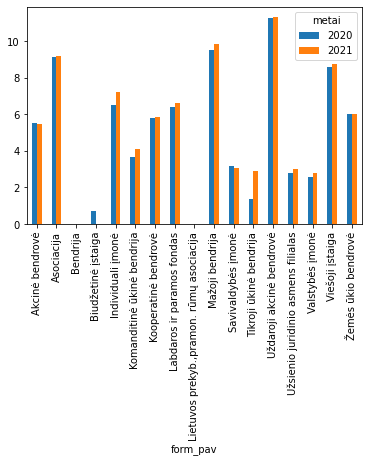

In [46]:
np.log(a).plot(kind='bar')

<font color='red'> Tomas Rasymas: 

1. Plot funkcija leidžia nurodyti kad log scale bus, nereikia pačiam konvertuoti.

</font>

10. Kurį mėnesį buvo įregistruota
daugiausiai juridinių asmenų 2020 ir
2021 metais?  
Atvaizduokite stulpelinę diagramą.  

ats:  
daugiausiai įregistruota 2021 gegužės mėn.


In [47]:
df_blns_comb['reg_date'] = df_blns_comb['reg_date'].astype('datetime64[ns]')

In [48]:
df_blns_comb['reg_year_month'] = df_blns_comb['reg_date'].dt.strftime('%Y-%m')

In [49]:
df_blns_comb

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,...,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data,unikalus_id,metai,reg_year_month
0,305217929,"MB ""Jantaris""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,2019-12-31,2020-05-14,1610.0000,NaN,0.0000,1684.0000,2022-12-01,305217929_2019-07-27,2020,2020-05
1,304127368,"Alytaus neformaliojo švietimo centras ""Toleran...",630,Asociacija,0,Teisinis stat neįregistruotas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST216,FINANSINĖS BŪKLĖS ATASKAITA,...,2019-12-31,2020-05-25,243.0000,0.0000,0.0000,243.0000,2022-12-01,304127368_2019-01-01,2020,2020-05
2,304759186,"Uždaroji akcinė bendrovė ""Balsana LT""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2019-12-31,2020-04-22,-20442.0000,93324.0000,2619.0000,69759.0000,2022-12-01,304759186_2019-01-01,2020,2020-04
3,191160250,"Kretingos sporto klubas ""Žalgiris""",630,Asociacija,0,Teisinis stat neįregistruotas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST216,FINANSINĖS BŪKLĖS ATASKAITA,...,2019-12-31,2020-02-04,0.0000,0.0000,0.0000,2935.0000,2022-12-01,191160250_2019-01-01,2020,2020-02
4,304512862,"UAB ""Tedėja""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2019-12-31,2020-05-05,557480.0000,19462.0000,406399.0000,170543.0000,2022-12-01,304512862_2019-01-01,2020,2020-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120845,303876368,"UAB ""Kultūra""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-07-05,-46249.0000,57348.0000,4532.0000,21328.0000,2022-12-01,303876368_2020-01-01,2021,2021-07
120846,302423888,"UAB ""People Link""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-06-01,350452.0000,91145.0000,58520.0000,370571.0000,2022-12-01,302423888_2020-01-01,2021,2021-06
120847,304287390,"UAB ""Nogridas""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-07-08,-279254.0000,1416261.0000,30132.0000,1103876.0000,2022-12-01,304287390_2020-01-01,2021,2021-07
120848,304852509,"MB ""Jonis ir Jonis""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,2020-12-31,2021-03-23,-648.0000,NaN,0.0000,861.0000,2022-12-01,304852509_2020-01-01,2021,2021-03


<AxesSubplot:title={'center':'Įregistruotų įmonių skaičius per mėnesį'}, xlabel='reg_year_month'>

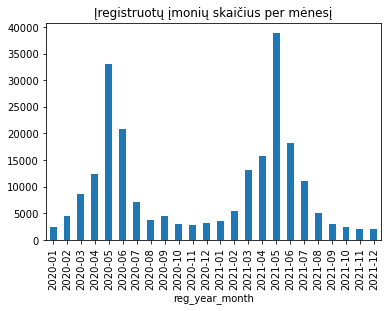

In [50]:
df_blns_comb.groupby(['reg_year_month'])['unikalus_id'].count().plot(kind='bar', title = 'Įregistruotų įmonių skaičius per mėnesį')

11. Vizualiai atvaizduoti juridinių asmenų statuso pasiskirstymą kiekvienais metais.

In [51]:
jur_asm = df_blns_comb.groupby(['stat_statusas', 'metai'])['unikalus_id'].count().reset_index(name='kiekis')

In [52]:
jur_asm

,stat_statusas,metai,kiekis
0,0,2020,101084
1,0,2021,116097
2,1,2020,78
3,1,2021,186
4,2,2020,43
5,2,2021,41
6,3,2020,56
7,3,2021,84
8,4,2020,45
9,4,2021,50


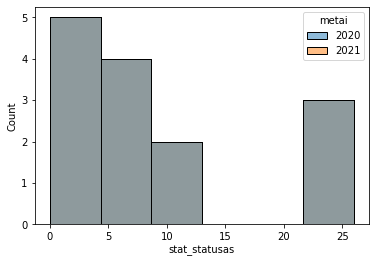

In [53]:
hist = sns.histplot(data=jur_asm, x="stat_statusas", hue='metai')

<font color='red'> Tomas Rasymas: 

1. Stenkis visur naudoti vienodas kabutes, arba viengubas arba dvigubas, nenaudok tai vienų tai kitų.
2. Abiejų metų stulpeliai grafike susidengia ir sunku interpretuoti. Taip pat matau jog naudoji statuso kodą o ne pavadinimą, kas vėl įneša papildomo darbo norint sužinoti atsakymą. 

</font>

12. Kiekvienai įmonei apskaičiuoti tendenciją. Jei “grynasis_pelnas” +
“nuosavas_kapitalas” 2021 metais buvo didesnis už 2020 metais deklaruotą, tai
tendencija “teigiama”, jei ne - “neigiama”. Atvaizduoti tendencijos duomenis
stulpelinėje diagramoje.

In [54]:
merged_df = pd.merge(df_plna_comb, df_blns_comb, on = ['unikalus_id'])

In [55]:
merged_df_cleaned = merged_df[['obj_pav_x', 'grynasis_pelnas', 'nuosavas_kapitalas', 'metai_x']]

In [56]:
merged_df_cleaned = merged_df_cleaned.rename(columns={'metai_x':'metai', 'obj_pav_x':'obj_pav'})

In [57]:
merged_df_cleaned = merged_df_cleaned.groupby(['obj_pav', 'metai'])['grynasis_pelnas', 'nuosavas_kapitalas'].mean()

C:\Users\TAUTVY~1\AppData\Local\Temp/ipykernel_14820/3544305776.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merged_df_cleaned = merged_df_cleaned.groupby(['obj_pav', 'metai'])['grynasis_pelnas', 'nuosavas_kapitalas'].mean()


In [58]:
merged_df_cleaned['gryn_peln_nuos_kap'] = merged_df_cleaned['grynasis_pelnas'] + merged_df_cleaned['nuosavas_kapitalas']

In [59]:
merged_df_cleaned = merged_df_cleaned.reset_index()

In [60]:
merged_df_cleaned

,obj_pav,metai,grynasis_pelnas,nuosavas_kapitalas,gryn_peln_nuos_kap
0,"""10 liepų"" UAB",2020,-89.0000,9911.0000,9822.0000
1,"""10 liepų"" UAB",2021,-65202.0000,144709.0000,79507.0000
2,"""1024 MB"" MB",2020,35.0000,-193.0000,-158.0000
3,"""1024 MB"" MB",2021,30363.0000,30170.0000,60533.0000
4,"""115 idėjų"" MB",2020,3563.0000,4173.0000,7736.0000
...,...,...,...,...,...
184301,ŽŪB Žadžiūnų ekologinis ūkis,2021,-15801.0000,6108.0000,-9693.0000
184302,ŽŪB Želsvelės ekologinis ūkis,2021,-1624.5000,14248.0000,12623.5000
184303,"ŽŪĮ ""GERAS ŪKIS"" UAB",2020,-116756.0000,12437.0000,-104319.0000
184304,"ŽŪĮ ""GERAS ŪKIS"" UAB",2021,90858.0000,103295.0000,194153.0000


In [61]:
unique_cmpns = pd.unique(merged_df_cleaned['obj_pav']).tolist()

In [62]:
tendencija = []

for cmpn in unique_cmpns:
    print(cmpn)
    try:
        if merged_df_cleaned[merged_df_cleaned[
        'obj_pav'] == cmpn].reset_index()['gryn_peln_nuos_kap'][1] - merged_df_cleaned[merged_df_cleaned[
        'obj_pav'] == cmpn].reset_index()['gryn_peln_nuos_kap'][0] > 0:
            tendencija.append('teigiama')
            tendencija.append('teigiama')
        elif merged_df_cleanedmerged_df_cleaned[merged_df_cleaned[
        'obj_pav'] == cmpn].reset_index()['gryn_peln_nuos_kap'][1] - merged_df_cleaned[merged_df_cleaned[
        'obj_pav'] == cmpn].reset_index()['gryn_peln_nuos_kap'][0] <=0:
            tendencija.append('neigiama')
            tendencija.append('neigiama')
        else:
            tendencija.append('neigiama')
    except:
        tendencija.append('neigiama')

In [ ]:
merged_df_cleaned['tendencija'] = tendencija

In [ ]:
merged_df_cleaned.groupby('tendencija')['obj_pav'].count().plot(kind='bar')

<font color='red'> Tomas Rasymas: 

1. Labai jau ilgas skaičiavimas, geriau būtų panaudoti broadcastinimą.

</font>

13. Surasti UAB ir MB įmones, kurios 2020 vykdė veiklą, o 2021 - bankrutavo.
Bankrutavusių įmonių statusai: “Bankrutavęs”, “Bankrutuojantis”, “Išregistruotas”,
“Inicijuojamas likvidavimas”, “Likviduojamas”, “Likviduojamas dėl bankroto”. Toliau
veiklą vykdanti įmonė pažymėta "Teisinis stat neįregistruotas" statusu. Kokia
bankrutavusių įmonių “nuosavas_kapitalas”suma 2021 metais? Kokia bankrutavusių
įmonių “grynasis_pelnas” suma 2021 metais? Palyginti šias sumas su veikiančių
įmonių atitinkamomis sumomis.  

ats:  
2020 vykdė veiklą, o 2021 bankrutavo:  
UAB "Kesko Senukai Digital"  
Uždaroji akcinė bendrovė "Agrovet"  
Uždaroji akcinė bendrovė "Saulenė"  
Uždaroji akcinė bendrovė "Pušis"  

bankrutavusių įmonių nuosavas kapitalas 2021: 1076457993.0  
veikiančių įmonių nuosavas kapitalas 2021: 70932596583.0  

bankrutavusių įmonių grynasis pelnas 2021: -146826942.0  
veikiančių įmonių grynasis pelnas 2021: 6108936972.0



In [63]:
bankrotas = ['Bankrutavęs', 'Bankrutuojantis', 'Išregistruotas', 'Inicijuojamas likvidavimas', 'Likviduojamas', 'Likviduojamas dėl bankroto']

In [64]:
# MB ir UAB įmonės kurios dirbo 2020
df_veikia = df_blns_comb.query(
    ''' stat_pav == 'Teisinis stat neįregistruotas' & metai == '2020' & (form_pav == 'Mažoji bendrija' | form_pav == 'Uždaroji akcinė bendrovė') ''')
df_veikia

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,...,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data,unikalus_id,metai,reg_year_month
0,305217929,"MB ""Jantaris""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,2019-12-31,2020-05-14,1610.0000,NaN,0.0000,1684.0000,2022-12-01,305217929_2019-07-27,2020,2020-05
2,304759186,"Uždaroji akcinė bendrovė ""Balsana LT""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2019-12-31,2020-04-22,-20442.0000,93324.0000,2619.0000,69759.0000,2022-12-01,304759186_2019-01-01,2020,2020-04
4,304512862,"UAB ""Tedėja""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2019-12-31,2020-05-05,557480.0000,19462.0000,406399.0000,170543.0000,2022-12-01,304512862_2019-01-01,2020,2020-05
5,222022510,"Uždaroji akcinė bendrovė ""RUTONIS""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0028,"Labai mažų įmonių, taikančių išimtis, finansin...",BST022,BALANSAS (Trumpas),...,2016-12-31,2020-06-19,2830.0000,1564.0000,164.0000,4230.0000,2022-12-01,222022510_2016-01-01,2020,2020-06
7,304085969,"MB ""Mondri darbai""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,2019-12-31,2020-03-31,69338.0000,NaN,21415.0000,108796.0000,2022-12-01,304085969_2019-01-01,2020,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106312,302442493,"UAB ""Kalduja""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2019-12-31,2020-02-04,5809.0000,30.0000,5000.0000,839.0000,2022-12-01,302442493_2019-01-01,2020,2020-02
106313,302564216,"UAB ""Rizolta""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2019-12-31,2020-09-22,113493.0000,90023.0000,82589.0000,120916.0000,2022-12-01,302564216_2019-01-01,2020,2020-09
106314,300613091,"UAB ""Berta And""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2019-12-31,2020-06-01,145088.0000,1053470.0000,150544.0000,922735.0000,2022-12-01,300613091_2019-01-01,2020,2020-06
106315,304213995,"UAB ""Kemo statyba""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2019-12-31,2020-05-28,22305.0000,26599.0000,4968.0000,43777.0000,2022-12-01,304213995_2019-01-01,2020,2020-05


In [65]:
# MB ir UAB kurios bankrutavo 2021
df_bnkrt = df_blns_comb[df_blns_comb['stat_pav'].isin(bankrotas)].query(''' metai == '2021' & (form_pav == 'Mažoji bendrija' | form_pav == 'Uždaroji akcinė bendrovė') ''')
df_bnkrt

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,...,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data,unikalus_id,metai,reg_year_month
4,304639436,"""Mivildos komercija"" UAB",310,Uždaroji akcinė bendrovė,26,Likviduojamas dėl bankroto,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),...,2020-12-31,2021-05-17,-146757.0000,497610.0000,0.0000,350853.0000,2022-12-01,304639436_2020-01-01,2021,2021-05
62,302315574,"UAB ""VRA GROUP""",310,Uždaroji akcinė bendrovė,10,Išregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2021-04-26,2021-05-26,0.0000,0.0000,0.0000,0.0000,2022-12-01,302315574_2021-01-01,2021,2021-05
127,141839359,"Uždaroji akcinė bendrovė ""PERGAMAS""",310,Uždaroji akcinė bendrovė,26,Likviduojamas dėl bankroto,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-06-07,-432493.0000,504871.0000,207.0000,72171.0000,2022-12-01,141839359_2020-01-01,2021,2021-06
250,303349572,"MB ""Beta redukcija""",960,Mažoji bendrija,7,Likviduojamas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,2020-12-31,2021-07-12,0.0000,NaN,0.0000,0.0000,2022-12-01,303349572_2020-01-01,2021,2021-07
277,304896815,"UAB ""Medicinos namai""",310,Uždaroji akcinė bendrovė,10,Išregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-03-29,177141.0000,264662.0000,190455.0000,195961.0000,2022-12-01,304896815_2020-01-01,2021,2021-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120568,302330448,"UAB ""Architelio statyba""",310,Uždaroji akcinė bendrovė,6,Bankrutavęs,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-05-24,-992580.0000,1428875.0000,0.0000,436295.0000,2022-12-01,302330448_2020-01-01,2021,2021-05
120588,305659751,Jeka partners MB,960,Mažoji bendrija,10,Išregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,2020-12-31,2021-04-07,209.0000,NaN,0.0000,263.0000,2022-12-01,305659751_2020-11-20,2021,2021-04
120590,122754527,"Uždaroji akcinė bendrovė ""SORENPINA""",310,Uždaroji akcinė bendrovė,10,Išregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-05-24,367516.0000,33781.0000,1948.0000,399349.0000,2022-12-01,122754527_2020-01-01,2021,2021-05
120698,300063498,"UAB ""Webhelp LT""",310,Uždaroji akcinė bendrovė,7,Likviduojamas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-02-17,-42654.0000,184378.0000,11334.0000,128744.0000,2022-12-01,300063498_2020-01-01,2021,2021-02


In [66]:
# unikalus MB ir UAB bankrutavusių 2021 sąrašas
bnkrt_list = pd.unique(df_bnkrt['obj_pav']).tolist()

In [67]:
# gaunamos MB ir UAB kurios veikė 2020 tačiau bankrutavo 2021
df_veikia[df_veikia['obj_pav'].isin(bnkrt_list)]

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,...,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data,unikalus_id,metai,reg_year_month
13706,303686899,"UAB ""Kesko Senukai Digital""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2019-12-31,2020-08-14,4567930.0000,11250149.0000,15266638.0000,560032.0000,2022-12-01,303686899_2019-01-01,2020,2020-08
16700,159627381,"Uždaroji akcinė bendrovė ""Agrovet""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2019-12-31,2020-06-04,2320.0000,168.0000,356.0000,2132.0000,2022-12-01,159627381_2019-01-01,2020,2020-06
64144,166648269,"Uždaroji akcinė bendrovė ""Saulenė""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),...,2019-12-31,2020-04-26,7033.0000,3029.0000,0.0000,10062.0000,2022-12-01,166648269_2019-01-01,2020,2020-04
104082,152019992,"Uždaroji akcinė bendrovė ""Pušis""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2019-12-31,2020-04-21,24048.0000,322.0000,1553.0000,22817.0000,2022-12-01,152019992_2019-01-01,2020,2020-04


In [68]:
# visos įmonės kurios bankrutavo 2021 (balanso ataskaita)
df_bnkrt_all_blns = df_blns_comb[df_blns_comb['stat_pav'].isin(bankrotas)].query(''' metai == '2021' ''')
df_bnkrt_all_blns

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,...,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data,unikalus_id,metai,reg_year_month
4,304639436,"""Mivildos komercija"" UAB",310,Uždaroji akcinė bendrovė,26,Likviduojamas dėl bankroto,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),...,2020-12-31,2021-05-17,-146757.0000,497610.0000,0.0000,350853.0000,2022-12-01,304639436_2020-01-01,2021,2021-05
62,302315574,"UAB ""VRA GROUP""",310,Uždaroji akcinė bendrovė,10,Išregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2021-04-26,2021-05-26,0.0000,0.0000,0.0000,0.0000,2022-12-01,302315574_2021-01-01,2021,2021-05
127,141839359,"Uždaroji akcinė bendrovė ""PERGAMAS""",310,Uždaroji akcinė bendrovė,26,Likviduojamas dėl bankroto,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-06-07,-432493.0000,504871.0000,207.0000,72171.0000,2022-12-01,141839359_2020-01-01,2021,2021-06
157,110567217,"Akcinė bendrovė ""KRAFT FOODS LIETUVA""",320,Akcinė bendrovė,10,Išregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-05-26,56392128.0000,44.0000,0.0000,56392172.0000,2022-12-01,110567217_2020-01-01,2021,2021-05
250,303349572,"MB ""Beta redukcija""",960,Mažoji bendrija,7,Likviduojamas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,2020-12-31,2021-07-12,0.0000,NaN,0.0000,0.0000,2022-12-01,303349572_2020-01-01,2021,2021-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120695,302470592,LRK ENERGIJA,630,Asociacija,10,Išregistruotas,FS0034,"Labdaros ir paramos fondų, asociacijų metinės ...",BST026,METINĖS ATASKAITOS DUOMENYS,...,2020-12-31,2021-05-20,7152.0000,NaN,NaN,NaN,2022-12-01,302470592_2020-01-01,2021,2021-05
120698,300063498,"UAB ""Webhelp LT""",310,Uždaroji akcinė bendrovė,7,Likviduojamas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-02-17,-42654.0000,184378.0000,11334.0000,128744.0000,2022-12-01,300063498_2020-01-01,2021,2021-02
120721,305572168,"MB ""Klausfina""",960,Mažoji bendrija,10,Išregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-03-28,117.0000,0.0000,0.0000,117.0000,2022-12-01,305572168_2020-06-12,2021,2021-03
120731,304504748,VšĮ Vidmanto Malakausko kultūrizmo klubas,570,Viešoji įstaiga,7,Likviduojamas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST216,FINANSINĖS BŪKLĖS ATASKAITA,...,2020-12-31,2021-03-02,5.0000,0.0000,0.0000,5.0000,2022-12-01,304504748_2020-01-01,2021,2021-03


In [69]:
# visų bankrutavusių 2021 įmonių nuosavo kapitalo suma
df_bnkrt_all_blns['nuosavas_kapitalas'].sum()

1076457993.0

In [70]:
# visos įmonės kurios bankrutavo 2021 (pelno-nuostolio ataskaita)
df_bnkrt_all_plna = df_plna_comb[df_plna_comb['stat_pav'].isin(bankrotas)].query(''' metai == '2021' ''')
df_bnkrt_all_plna

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data,unikalus_id,metai
80,302776742,"UAB ""SOSCREDIT""",310,Uždaroji akcinė bendrovė,5,Bankrutuojantis,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2020-01-01,2020-12-31,2021-07-20,-2715949.0000,-2715949.0000,1755908.0000,2022-12-01,302776742_2020-01-01,2021
84,305661421,MB Ramunės naminis maistas,960,Mažoji bendrija,7,Likviduojamas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,IST118,PELNO (NUOSTOLIŲ) ATASKAITA (Neribotos civilin...,2020-11-24,2020-12-31,2021-03-30,-1121.0000,-1121.0000,1580.0000,2022-12-01,305661421_2020-11-24,2021
105,300543013,"UAB ""ELIT MOD""",310,Uždaroji akcinė bendrovė,10,Išregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2020-01-01,2020-12-31,2021-05-01,0.0000,0.0000,NaN,2022-12-01,300543013_2020-01-01,2021
166,110759356,Lietuvos ir Vokietijos uždaroji akcinė bendrov...,310,Uždaroji akcinė bendrovė,10,Išregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2020-01-01,2020-12-31,2021-03-07,-48.0000,-48.0000,NaN,2022-12-01,110759356_2020-01-01,2021
172,305191509,"UAB ""Klaistata""",310,Uždaroji akcinė bendrovė,26,Likviduojamas dėl bankroto,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2020-01-01,2020-12-31,2021-03-22,-19212.0000,-19212.0000,70672.0000,2022-12-01,305191509_2020-01-01,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110201,304497823,"UAB ""Etnina""",310,Uždaroji akcinė bendrovė,26,Likviduojamas dėl bankroto,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),2020-01-01,2020-12-31,2021-09-16,NaN,-59.0000,NaN,2022-12-01,304497823_2020-01-01,2021
110202,164236231,Individuali įmonė,810,Individuali įmonė,10,Išregistruotas,FS0511,Neribotos civilinės atsakomybės juridinių asme...,IST118,PELNO (NUOSTOLIŲ) ATASKAITA (Neribotos civilin...,2019-01-01,2019-12-31,2021-03-26,629.0000,598.0000,850.0000,2022-12-01,164236231_2019-01-01,2021
110203,125765639,"UAB ""Ranga IV investicijos""",310,Uždaroji akcinė bendrovė,10,Išregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),2020-01-01,2020-12-31,2021-07-15,NaN,-6102909.0000,325.0000,2022-12-01,125765639_2020-01-01,2021
110210,302588480,"UAB ""KOMTELIT""",310,Uždaroji akcinė bendrovė,10,Išregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),2020-01-01,2020-12-31,2021-02-03,NaN,0.0000,0.0000,2022-12-01,302588480_2020-01-01,2021


In [71]:
# visų bankrutavusių 2021 įmonių grynojo pelno suma
df_bnkrt_all_plna['grynasis_pelnas'].sum()

-146826942.0

In [72]:
# visos įmonės kurios veikia 2021 (balanso ataskaita)
df_veikia_all_blns = df_blns_comb.query(''' metai == '2021' & stat_pav == 'Teisinis stat neįregistruotas' ''')
df_veikia_all_blns

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,...,laikotarpis_iki,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data,unikalus_id,metai,reg_year_month
0,304691059,"Asociacija ""Technikos asas""",630,Asociacija,0,Teisinis stat neįregistruotas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST216,FINANSINĖS BŪKLĖS ATASKAITA,...,2020-12-31,2021-06-01,0.0000,2296.0000,107230.0000,64024.0000,2022-12-01,304691059_2020-01-01,2021,2021-06
1,304432373,"UAB ""Remonto partneris""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),...,2020-12-31,2021-05-30,19429.0000,1149.0000,0.0000,20578.0000,2022-12-01,304432373_2020-01-01,2021,2021-05
2,124256347,Ora investments UAB,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0201,Sutrumpintų finansinių ataskaitų rinkinys,BST101,BALANSAS,...,2014-12-31,2021-12-07,19.0000,0.0000,0.0000,19.0000,2022-12-01,124256347_2014-01-01,2021,2021-12
3,304506852,MB Saviugdos mokymų centras,960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,2019-12-31,2021-07-13,3458.0000,NaN,2504.0000,1293.0000,2022-12-01,304506852_2019-01-01,2021,2021-07
5,303111806,"UAB ""Eurolista""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",BST122,BALANSAS (Trumpas),...,2020-12-31,2021-05-25,4693.0000,132.0000,0.0000,4825.0000,2022-12-01,303111806_2020-01-01,2021,2021-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120845,303876368,"UAB ""Kultūra""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-07-05,-46249.0000,57348.0000,4532.0000,21328.0000,2022-12-01,303876368_2020-01-01,2021,2021-07
120846,302423888,"UAB ""People Link""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-06-01,350452.0000,91145.0000,58520.0000,370571.0000,2022-12-01,302423888_2020-01-01,2021,2021-06
120847,304287390,"UAB ""Nogridas""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-12-31,2021-07-08,-279254.0000,1416261.0000,30132.0000,1103876.0000,2022-12-01,304287390_2020-01-01,2021,2021-07
120848,304852509,"MB ""Jonis ir Jonis""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,2020-12-31,2021-03-23,-648.0000,NaN,0.0000,861.0000,2022-12-01,304852509_2020-01-01,2021,2021-03


In [73]:
df_veikia_all_blns['nuosavas_kapitalas'].sum()

70932596583.0

In [74]:
# visos įmonės kurios nepatyrė bankroto 2021 (pelno-nuostolio ataskaita)
df_veikia_all_plna = df_plna_comb.query(''' metai == '2021' & stat_pav == 'Teisinis stat neįregistruotas' ''')
df_veikia_all_plna

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data,unikalus_id,metai
0,302570315,"UAB ""Motorbike""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2020-01-01,2020-12-31,2021-04-24,-5472.0000,-5472.0000,299601.0000,2022-12-01,302570315_2020-01-01,2021
1,305433485,UAB City of Ideas,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),2020-01-21,2020-12-31,2021-05-25,NaN,-688.0000,NaN,2022-12-01,305433485_2020-01-21,2021
2,302746902,"UAB ""RP paslaugos""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),2020-01-01,2020-12-31,2021-05-24,NaN,25105.0000,55056.0000,2022-12-01,302746902_2020-01-01,2021
3,301502553,"UAB ""Plungės laminuotos grindys""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2020-01-01,2020-12-31,2021-04-02,0.0000,0.0000,0.0000,2022-12-01,301502553_2020-01-01,2021
4,303078893,"MB ""Skaniai""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,IST118,PELNO (NUOSTOLIŲ) ATASKAITA (Neribotos civilin...,2020-01-01,2020-12-31,2021-03-29,44103.0000,36571.0000,278678.0000,2022-12-01,303078893_2020-01-01,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110222,304286979,"UAB ""Termoprojektai""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),2020-01-01,2020-12-31,2021-03-22,NaN,63288.0000,473710.0000,2022-12-01,304286979_2020-01-01,2021
110223,300630774,Brožių kaimo bendruomenė,630,Asociacija,0,Teisinis stat neįregistruotas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,IST117,VEIKLOS REZULTATŲ ATASKAITA,2020-01-01,2020-12-31,2021-03-30,NaN,NaN,182633.0000,2022-12-01,300630774_2020-01-01,2021
110224,304142523,"MB ""Augilora""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,IST118,PELNO (NUOSTOLIŲ) ATASKAITA (Neribotos civilin...,2020-01-01,2020-12-31,2021-03-29,1294.0000,1226.0000,41007.0000,2022-12-01,304142523_2020-01-01,2021
110225,300542872,"Uždaroji akcinė bendrovė ""Kestana""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2020-01-01,2020-12-31,2021-04-14,-12488.0000,-12488.0000,161924.0000,2022-12-01,300542872_2020-01-01,2021


In [75]:
df_veikia_all_plna['grynasis_pelnas'].sum()

6108936972.0

<font color='red'> Tomas Rasymas: 

1. Manual checkas išduotų kad kažkas nėra gerai, nemanau kad "UAB "Kesko Senukai Digital"" bankrutuotų greitu laiku.

</font>

14. Sukurti naują stulpelį “turtas”, kuris skaičiuojamas sudedant “trumpalaikis_turtas” ir
“ilgalaikis_turtas”.    

a. Suskirstyti įmones į 5 grupes pagal lauką “turtas”.  

b. Palyginti kaip šios grupės keičiasi 2020 ir 2021 metais. Palyginimą atvaizduoti 
skrituline diagrama ir gauti tokį patį kaip apačioje pavaizduotas paveikslas
(skaitinės reikšmės gali skirtis):  

i. naudojantis matplotlib funkcionalumu.  
ii. naudojantis pandas funkcionalumu.

In [76]:
df_blns_comb['turtas'] = df_blns_comb['trumpalaikis_turtas'] + df_blns_comb['ilgalaikis_turtas']

In [77]:
df_blns_comb

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,...,reg_date,nuosavas_kapitalas,mok_sumos_ir_isipareigojimai,ilgalaikis_turtas,trumpalaikis_turtas,formavimo_data,unikalus_id,metai,reg_year_month,turtas
0,305217929,"MB ""Jantaris""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,2020-05-14,1610.0000,NaN,0.0000,1684.0000,2022-12-01,305217929_2019-07-27,2020,2020-05,1684.0000
1,304127368,"Alytaus neformaliojo švietimo centras ""Toleran...",630,Asociacija,0,Teisinis stat neįregistruotas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST216,FINANSINĖS BŪKLĖS ATASKAITA,...,2020-05-25,243.0000,0.0000,0.0000,243.0000,2022-12-01,304127368_2019-01-01,2020,2020-05,243.0000
2,304759186,"Uždaroji akcinė bendrovė ""Balsana LT""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-04-22,-20442.0000,93324.0000,2619.0000,69759.0000,2022-12-01,304759186_2019-01-01,2020,2020-04,72378.0000
3,191160250,"Kretingos sporto klubas ""Žalgiris""",630,Asociacija,0,Teisinis stat neįregistruotas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST216,FINANSINĖS BŪKLĖS ATASKAITA,...,2020-02-04,0.0000,0.0000,0.0000,2935.0000,2022-12-01,191160250_2019-01-01,2020,2020-02,2935.0000
4,304512862,"UAB ""Tedėja""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2020-05-05,557480.0000,19462.0000,406399.0000,170543.0000,2022-12-01,304512862_2019-01-01,2020,2020-05,576942.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120845,303876368,"UAB ""Kultūra""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2021-07-05,-46249.0000,57348.0000,4532.0000,21328.0000,2022-12-01,303876368_2020-01-01,2021,2021-07,25860.0000
120846,302423888,"UAB ""People Link""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2021-06-01,350452.0000,91145.0000,58520.0000,370571.0000,2022-12-01,302423888_2020-01-01,2021,2021-06,429091.0000
120847,304287390,"UAB ""Nogridas""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,2021-07-08,-279254.0000,1416261.0000,30132.0000,1103876.0000,2022-12-01,304287390_2020-01-01,2021,2021-07,1134008.0000
120848,304852509,"MB ""Jonis ir Jonis""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,2021-03-23,-648.0000,NaN,0.0000,861.0000,2022-12-01,304852509_2020-01-01,2021,2021-03,861.0000


In [78]:
groups=[]
for  i in df_blns_comb['turtas']:
    if i < 3000:
        group = 'iki 3k'
    elif 3000 <= i < 20000:
        group = '3k-20k'
    elif 20000 <= i < 35000:
        group = '20k-35k'
    elif 35000 <= i < 70000:
        group = '35k-70k'
    elif i >= 70000:
        group = '70k+'
    groups.append(group)

In [79]:
# checking if same number of values retrieved compared to row number of df
len(groups)

227168

In [80]:
df_blns_comb['turto_grupė'] = groups

In [81]:
df_blns_comb.query(''' metai == '2020' ''').groupby(['turto_grupė'])['unikalus_id'].count()

turto_grupė
20k-35k     9194
35k-70k    11769
3k-20k     21938
70k+       42061
iki 3k     21356
Name: unikalus_id, dtype: int64

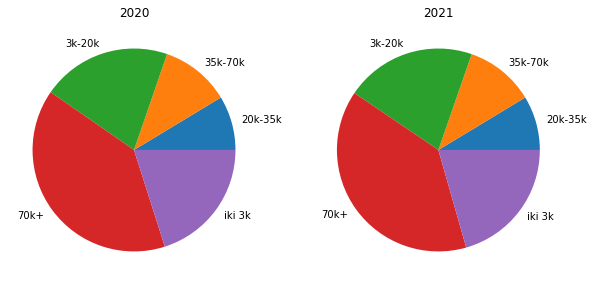

In [82]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,8))


plt_20 = df_blns_comb.query(''' metai == '2020' ''').groupby(['turto_grupė'])['unikalus_id'].count().plot(kind='pie', title='2020', ax=ax1, ylabel = '')
plt_21 = df_blns_comb.query(''' metai == '2021' ''').groupby(['turto_grupė'])['unikalus_id'].count().plot(kind='pie', title='2021',ax=ax2, ylabel = '')

<font color='red'> Tomas Rasymas: 

1. Vietoje if..else.. efektyviau yra panaudoti `pd.cut` funkciją
2. Sunku interpretuoti grafikus, kai juose nėra jokios dydžių indikacijos.

</font>

15. Rasti TOP-100 pelningiausių įmonių pagal “grynasis pelnas” ir TOP-100 įmonių kurių
“nuosavas kapitalas” didžiausias. Ar yra sutampančių įmonių šiuose sąrašuose?
Skaičiuojant TOP įmonės įtraukti viso laikotarpio įmones (naudoti 2020 ir 2021 metų
duomenis kartu). 

In [83]:
df_pln = df_plna_comb.groupby(
    ['obj_pav'])['grynasis_pelnas'].mean().sort_values(ascending=False).head(100).to_frame().reset_index()

In [84]:
df_pln

,obj_pav,grynasis_pelnas
0,"UAB ""Thermo Fisher Scientific Baltics""",326035597.5000
1,MAXIMA LT UAB,151670500.0000
2,"AB ""Ignitis grupė""",73395000.0000
3,"UAB ""ME investicija""",62657674.0000
4,"UAB ""TELE2""",60717000.0000
...,...,...
95,"Uždaroji akcinė bendrovė ""HOPTRANSA""",7037687.0000
96,Estoty Vilnius UAB,7029127.0000
97,Apple Lithuania UAB,6937525.5000
98,"UAB ""ZIP7""",6927955.5000


In [85]:
top_100_pelnas = pd.unique(df_pln['obj_pav']).tolist()

In [86]:
df_kpt = df_blns_comb.groupby(
    ['obj_pav'])['nuosavas_kapitalas'].mean().sort_values(ascending=False).head(100).to_frame().reset_index()

In [87]:
top_100_kapitalas = pd.unique(df_kpt['obj_pav']).tolist()

In [88]:
# įmonės esančios tarp top100 pagal grynajį pelną bei esančios tarp top100 pagal nuosavą kapitalą
set(top_100_pelnas).intersection(set(top_100_kapitalas))

{'AB "Amber Grid"',
 'AB "Energijos skirstymo operatorius"',
 'AB "Ignitis gamyba"',
 'AB "Ignitis grupė"',
 'AB "LTG Infra"',
 'AB DFDS Seaways',
 'AB Vilniaus šilumos tinklai',
 'Akcinė bendrovė "Achema"',
 'Akcinė bendrovė "Invalda INVL"',
 'Akcinė bendrovė "Kauno grūdai"',
 'Akcinė bendrovė "LIFOSA"',
 'Akcinė bendrovė "Lietuvos geležinkeliai"',
 'Akcinė bendrovė "ŽEMAITIJOS PIENAS"',
 'Circle K Lietuva UAB',
 'GALIO GROUP UAB',
 'LITGRID AB',
 'MAXIMA LT UAB',
 'NDX Group UAB',
 'Telia Lietuva AB',
 'UAB "Bitė Lietuva"',
 'UAB "ERA Family"',
 'UAB "IN Group"',
 'UAB "Lidl Lietuva"',
 'UAB "ME investicija"',
 'UAB "Panorama LT"',
 'UAB "SANITEX"',
 'UAB "TELE2"',
 'UAB "Thermo Fisher Scientific Baltics"',
 'UAB "Trust Capital"',
 'UAB "VG HOLDING"',
 'UAB "Yukon Advanced Optics Worldwide"',
 'UAB Teva Baltics',
 'UAB koncernas "ACHEMOS GRUPĖ"',
 'UŽDAROJI AKCINĖ BENDROVĖ "LIETPAK"',
 'Uždaroji akcinė bendrovė "BALTISCHES HAUS"',
 'Uždaroji akcinė bendrovė "Kesko Senukai Lithuania"'

16. Ar TOP įmonės pagal “grynasis pelnas” iš 15 užduoties skiriasi pagal metus, t.y. 2020
ir 2021 metais? Kurios įmonės iškrenta iš TOP sąrašo 2021 metais?  

ats:  
taip, skiriasi

In [89]:
top_2020 = df_plna_comb.query(''' metai == '2020' ''').groupby(
    ['obj_pav'])['grynasis_pelnas'].mean().sort_values(ascending=False).head(100).to_frame().reset_index()['obj_pav'].tolist()

In [90]:
top_2021 = df_plna_comb.query(''' metai == '2021' ''').groupby(
    ['obj_pav'])['grynasis_pelnas'].mean().sort_values(ascending=False).head(100).to_frame().reset_index()['obj_pav'].tolist()

In [91]:
# įmonės kurios buvo tarp pelningiausių 2020 tačiau nebebuvo 2021
for i in top_2020:
    if not i in top_2021:
        print(i)

UAB "ERA Family"
Technopolis Lietuva UAB
UAB "Schage Real Estate"
Uždaroji akcinė bendrovė "VAKARŲ MEDIENOS GRUPĖ"
UAB "Panorama LT"
Akcinė bendrovė "Invalda INVL"
UAB "Avion Express"
UAB "GetJet Airlines"
UAB "ME HOLDING NT"
Uždaroji akcinė bendrovė "LITESKO"
AB "BALTIC SHOPPING CENTERS"
Valstybės įmonė Lietuvos oro uostai
UAB "Green Genius"
UAB "Sorensen Invest"
Uždarojo tipo informuotiesiems investuotojams skirta investicinė bendrovė UAB "Verslo trikampis"
UAB LIVE SQUARE LT
UAB "Daltonas"
AB "Amber Grid"
Uždarojo tipo informuotiesiems investuotojams skirta investicinė bendrovė UAB "LIM Verslo Trikampio NT Fondas"
UAB "Inter Krasta"
MAXIMA International Sourcing UAB
UAB "Klaško"
Specialioji uždarojo tipo nekilnojamojo turto investicinė bendrovė "INVL Baltic Real Estate"
UAB Gren Klaipėda
UAB "HEKON"
Silver Screen Holdings UAB
4Wind UAB
UAB "Vilniaus aidai"
Uždaroji akcinė bendrovė "Nemuno vaistinė"
UAB "Trust Capital"
UAB "SPECTATOR"
Atvirojo tipo Informuotiesiems investuotojams ski

<font color='red'> Tomas Rasymas: 

1. Vietoje ciklo galima panaudoti `symmetric_difference` funkciją.

</font>

<h1>Trečia dalis

In [92]:
# sample dataset
pd.read_csv('3_uzduotis_data_sample.csv')

,obj_kodas,obj_pav,form_pav,veiklos_kodas,veiklos_aprasymas,savivaldybe,nuosavas_kapitalas_20,mok_sumos_ir_isipareigojimai_20,ilgalaikis_turtas_20,trumpalaikis_turtas_20,...,vid_atlyginimas_20,darbuotoju_skaicius_20,nuosavas_kapitalas_21,mok_sumos_ir_isipareigojimai_21,ilgalaikis_turtas_21,trumpalaikis_turtas_21,pardavimo_pajamos_21,grynasis_pelnas_21,vid_atlyginimas_21,darbuotoju_skaicius_21
0,304065621,"UAB ""Stasinės dvaro sodyba""",Uždaroji akcinė bendrovė,561000.0000,Restoranų ir pagaminto valgio teikimo veikla,Kėdainių r. sav.,21069.0000,56108.0000,63042.0000,13846.0000,...,392.4600,7,22388.0000,51680.0000,59531.0000,14221.0000,48669.0000,1319.0000,430.3600,5
1,302542376,"UAB ""Gedimino 9""",Uždaroji akcinė bendrovė,682000.0000,Nuosavo arba nuomojamo nekilnojamojo turto nuo...,Vilniaus m. sav.,3446280.0000,33399866.0000,37591281.0000,193014.0000,...,1359.2900,4,3823724.0000,33130389.0000,37170443.0000,610823.0000,2916657.0000,377444.0000,1743.1200,4
2,302572526,"UAB ""ARITRA""",Uždaroji akcinė bendrovė,494100.0000,Krovininis kelių transportas,Panevėžio r. sav.,128619.0000,404487.0000,124635.0000,409972.0000,...,619.0700,11,10001.0000,519902.0000,125544.0000,405727.0000,368274.0000,-119074.0000,666.9100,9
3,111822140,"UAB ""OneMed""",Uždaroji akcinė bendrovė,464600.0000,Farmacijos prekių didmeninė prekyba,Vilniaus m. sav.,218936.0000,544480.0000,82073.0000,720371.0000,...,1539.5700,7,543010.0000,347916.0000,15500.0000,921278.0000,3005146.0000,324074.0000,2813.4400,7
4,225033960,"UAB ZOOVETERINARIJOS CENTRAS ""TOTO""",Uždaroji akcinė bendrovė,750000.0000,Veterinarinė veikla,Vilniaus m. sav.,98829.0000,236735.0000,266798.0000,67609.0000,...,1353.7800,24,103998.0000,206580.0000,223964.0000,85282.0000,909893.0000,19696.0000,1462.8600,26
5,300586623,"UAB ""EASY RENTAL""",Uždaroji akcinė bendrovė,451100.0000,Automobilių ir lengvųjų variklinių transporto ...,Vilniaus m. sav.,59128.0000,348610.0000,98802.0000,309821.0000,...,862.9000,4,101402.0000,225829.0000,81273.0000,245445.0000,581604.0000,41715.0000,1105.7500,4
6,304640221,"UAB ""Metropolio viešbutis""",Uždaroji akcinė bendrovė,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,Vilniaus m. sav.,-63871.0000,117496.0000,327.0000,56751.0000,...,718.2600,14,9144.0000,67452.0000,616.0000,71308.0000,290994.0000,8815.0000,567.2900,13
7,165787440,"Uždaroji akcinė bendrovė ""MAVISTA""",Uždaroji akcinė bendrovė,432200.0000,"Vandentiekio, šildymo ir oro kondicionavimo si...",Marijampolės sav.,1244727.0000,299629.0000,504166.0000,1023356.0000,...,1156.8600,62,1359813.0000,117127.0000,471634.0000,988034.0000,2837038.0000,115086.0000,1252.0900,56
8,303161403,"UAB ""TV partneriai""",Uždaroji akcinė bendrovė,602000.0000,Televizijos programų rengimas ir transliavimas,Kauno m. sav.,166115.0000,136662.0000,163103.0000,138243.0000,...,1266.1700,9,279164.0000,229568.0000,218520.0000,286010.0000,668176.0000,112764.0000,957.9700,9
9,300152018,"Uždaroji akcinė bendrovė ""Renavita""",Uždaroji akcinė bendrovė,692000.0000,"Apskaitos, buhalterijos ir audito veikla; kons...",Kauno m. sav.,-52328.0000,99447.0000,3755.0000,42948.0000,...,642.2800,7,-43092.0000,94493.0000,1348.0000,50053.0000,68008.0000,9236.0000,1010.2400,5


In [93]:
df_blns_2020
df_blns_2021
df_plna_2020
df_plna_2021

,obj_kodas,obj_pav,form_kodas,form_pav,stat_statusas,stat_pav,template_id,template_name,standard_id,standard_name,laikotarpis_nuo,laikotarpis_iki,reg_date,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data,unikalus_id,metai
0,302570315,"UAB ""Motorbike""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2020-01-01,2020-12-31,2021-04-24,-5472.0000,-5472.0000,299601.0000,2022-12-01,302570315_2020-01-01,2021
1,305433485,UAB City of Ideas,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),2020-01-21,2020-12-31,2021-05-25,NaN,-688.0000,NaN,2022-12-01,305433485_2020-01-21,2021
2,302746902,"UAB ""RP paslaugos""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),2020-01-01,2020-12-31,2021-05-24,NaN,25105.0000,55056.0000,2022-12-01,302746902_2020-01-01,2021
3,301502553,"UAB ""Plungės laminuotos grindys""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2020-01-01,2020-12-31,2021-04-02,0.0000,0.0000,0.0000,2022-12-01,301502553_2020-01-01,2021
4,303078893,"MB ""Skaniai""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,IST118,PELNO (NUOSTOLIŲ) ATASKAITA (Neribotos civilin...,2020-01-01,2020-12-31,2021-03-29,44103.0000,36571.0000,278678.0000,2022-12-01,303078893_2020-01-01,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110222,304286979,"UAB ""Termoprojektai""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0128,"Labai mažų įmonių, taikančių išimtis, finansin...",IST023,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),2020-01-01,2020-12-31,2021-03-22,NaN,63288.0000,473710.0000,2022-12-01,304286979_2020-01-01,2021
110223,300630774,Brožių kaimo bendruomenė,630,Asociacija,0,Teisinis stat neįregistruotas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,IST117,VEIKLOS REZULTATŲ ATASKAITA,2020-01-01,2020-12-31,2021-03-30,NaN,NaN,182633.0000,2022-12-01,300630774_2020-01-01,2021
110224,304142523,"MB ""Augilora""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,IST118,PELNO (NUOSTOLIŲ) ATASKAITA (Neribotos civilin...,2020-01-01,2020-12-31,2021-03-29,1294.0000,1226.0000,41007.0000,2022-12-01,304142523_2020-01-01,2021
110225,300542872,"Uždaroji akcinė bendrovė ""Kestana""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",IST024,PELNO (NUOSTOLIŲ) ATASKAITA,2020-01-01,2020-12-31,2021-04-14,-12488.0000,-12488.0000,161924.0000,2022-12-01,300542872_2020-01-01,2021


In [94]:
sodra_2020 = pd.read_csv('monthly-2020.csv', sep = ';')
sodra_2021 = pd.read_csv('monthly-2021.csv', sep = ';')

In [95]:
sodra_2020

,Draudėjo kodas (code),Juridinių asmenų registro kodas (jarCode),Pavadinimas (name),"Savivaldybė, kurioje registruota(municipality)",Ekonominės veiklos rūšies kodas(ecoActCode),Ekonominės veiklos rūšies pavadinimas(ecoActName),Mėnuo (month),Vidutinis darbo užmokestis (avgWage),Apdraustųjų skaičius (numInsured),Vidutinis darbo užmokestis II (avgWage2),Apdraustųjų skaičius II (numInsured2),Valstybinio socialinio draudimo įmoka (tax)
0,42399,NaN,LATVIJOS RESPUBLIKOS AMBASADA,Vilniaus m. sav.,NaN,NaN,202001,NaN,3,NaN,0,NaN
1,45838,NaN,GOETHE-INSTITUT,Vilniaus m. sav.,NaN,NaN,202001,1763.6100,7,NaN,0,2764.4700
2,50764,NaN,BRITŲ TARYBA,Vilniaus m. sav.,NaN,NaN,202001,2045.0200,6,NaN,0,2826.8800
3,51006,NaN,LENKIJOS RESPUBLIKOS AMBASADA,Vilniaus m. sav.,NaN,NaN,202001,1272.6200,23,NaN,0,6578.4600
4,51164,NaN,RUSIJOS FEDERACIJOS AMBASADOS SOCIALINIO APRŪP...,Vilniaus m. sav.,NaN,NaN,202001,1147.0800,18,NaN,0,4588.6500
...,...,...,...,...,...,...,...,...,...,...,...,...
1177768,3782772,305672446.0000,UAB MAJUVIS,Klaipėdos m. sav.,620200.0000,Kompiuterių konsultacinė veikla,202012,NaN,1,NaN,0,NaN
1177769,3782984,305672510.0000,"UAB ""LT MOTORS""",Šiaulių m. sav.,451100.0000,Automobilių ir lengvųjų variklinių transporto ...,202012,NaN,1,NaN,0,NaN
1177770,3782831,305672962.0000,NOVODOOR BALTIC UAB,Vilniaus m. sav.,460000.0000,"Didmeninė prekyba, išskyrus prekybą variklinėm...",202012,NaN,1,NaN,0,NaN
1177771,3784506,305673306.0000,UŽDAROJI AKCINĖ BENDROVĖ BRELL,Kauno m. sav.,NaN,NaN,202012,NaN,1,NaN,0,NaN


In [96]:
sodra_2020 = sodra_2020.loc[:,['Juridinių asmenų registro kodas (jarCode)', 
                               'Savivaldybė, kurioje registruota(municipality)', 
                               'Ekonominės veiklos rūšies kodas(ecoActCode)', 
                               'Ekonominės veiklos rūšies pavadinimas(ecoActName)', 
                               'Vidutinis darbo užmokestis (avgWage)', 
                               'Apdraustųjų skaičius (numInsured)', 
                               'Mėnuo (month)']]

In [97]:
# pervadinu stulpeliu pavadinimus
sodra_2020 = sodra_2020.rename(columns = {'Juridinių asmenų registro kodas (jarCode)':'obj_kodas', 
                                          'Savivaldybė, kurioje registruota(municipality)':'savivaldybe', 
                                          'Ekonominės veiklos rūšies kodas(ecoActCode)':'veiklos_kodas', 
                                          'Ekonominės veiklos rūšies pavadinimas(ecoActName)':'veiklos_aprasymas', 
                                          'Vidutinis darbo užmokestis (avgWage)':'vid_atlyginimas_20', 
                                          'Apdraustųjų skaičius (numInsured)':'darbuotoju_skaicius_20', 
                                          'Mėnuo (month)':'mėnuo'})

In [98]:
# numetu visas nan obj_kodas reiksmes
sodra_2020 = sodra_2020.dropna(subset=['obj_kodas'])

In [99]:
sodra_2020['obj_kodas'] = sodra_2020['obj_kodas'].astype('int64')

In [100]:
sodra_2020 = sodra_2020.dropna()

In [101]:
sodra_2020

,obj_kodas,savivaldybe,veiklos_kodas,veiklos_aprasymas,vid_atlyginimas_20,darbuotoju_skaicius_20,mėnuo
6248,110004884,Vilniaus r. sav.,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,1274.3700,226,202001
6249,110004884,Vilniaus r. sav.,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,1299.6200,224,202002
6250,110004884,Vilniaus r. sav.,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,1090.1800,205,202003
6251,110004884,Vilniaus r. sav.,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,837.0600,158,202004
6252,110004884,Vilniaus r. sav.,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,1128.1800,167,202005
...,...,...,...,...,...,...,...
1177492,305658820,Vilniaus r. sav.,412000.0000,Gyvenamųjų ir negyvenamųjų pastatų statyba,157.3200,12,202012
1177532,305660052,Kauno m. sav.,562000.0000,Pagaminto valgio tiekimas renginiams ir kitų m...,537.0000,4,202012
1177624,305662808,Vilniaus m. sav.,680000.0000,Nekilnojamojo turto operacijos,1263.6300,11,202012
1177655,305664047,Vilniaus m. sav.,949900.0000,"Kitų, niekur kitur nepriskirtų, narystės organ...",2947.7900,6,202012


In [102]:
sodra_2020['data'] = pd.to_datetime(sodra_2020['mėnuo'],format='%Y%m')

In [103]:
sodra_2020['metai'] = sodra_2020['data'].dt.year

In [104]:
sodra_2020

,obj_kodas,savivaldybe,veiklos_kodas,veiklos_aprasymas,vid_atlyginimas_20,darbuotoju_skaicius_20,mėnuo,data,metai
6248,110004884,Vilniaus r. sav.,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,1274.3700,226,202001,2020-01-01,2020
6249,110004884,Vilniaus r. sav.,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,1299.6200,224,202002,2020-02-01,2020
6250,110004884,Vilniaus r. sav.,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,1090.1800,205,202003,2020-03-01,2020
6251,110004884,Vilniaus r. sav.,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,837.0600,158,202004,2020-04-01,2020
6252,110004884,Vilniaus r. sav.,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,1128.1800,167,202005,2020-05-01,2020
...,...,...,...,...,...,...,...,...,...
1177492,305658820,Vilniaus r. sav.,412000.0000,Gyvenamųjų ir negyvenamųjų pastatų statyba,157.3200,12,202012,2020-12-01,2020
1177532,305660052,Kauno m. sav.,562000.0000,Pagaminto valgio tiekimas renginiams ir kitų m...,537.0000,4,202012,2020-12-01,2020
1177624,305662808,Vilniaus m. sav.,680000.0000,Nekilnojamojo turto operacijos,1263.6300,11,202012,2020-12-01,2020
1177655,305664047,Vilniaus m. sav.,949900.0000,"Kitų, niekur kitur nepriskirtų, narystės organ...",2947.7900,6,202012,2020-12-01,2020


In [105]:
sodra_2020.groupby(['metai', 'obj_kodas', 'savivaldybe', 'veiklos_kodas', 'veiklos_aprasymas']).mean().reset_index()

,metai,obj_kodas,savivaldybe,veiklos_kodas,veiklos_aprasymas,vid_atlyginimas_20,darbuotoju_skaicius_20,mėnuo
0,2020,110004884,Vilniaus r. sav.,551000.0000,Viešbučių ir panašių laikinų buveinių veikla,1167.6825,190.7500,202006.5000
1,2020,110005648,Vilniaus m. sav.,620000.0000,"Kompiuterių programavimo, konsultacinė ir susi...",1981.8150,48.3333,202006.5000
2,2020,110008377,Vilniaus m. sav.,682000.0000,Nuosavo arba nuomojamo nekilnojamojo turto nuo...,1493.9158,4.0000,202006.5000
3,2020,110011925,Vilniaus m. sav.,422200.0000,Komunalinių elektros ir telekomunikacijos stat...,1906.2192,212.7500,202006.5000
4,2020,110012112,Vilniaus m. sav.,329900.0000,"Kita, niekur kitur nepriskirta, gamyba",1311.7917,202.1667,202006.5000
...,...,...,...,...,...,...,...,...
49102,2020,305658820,Vilniaus r. sav.,412000.0000,Gyvenamųjų ir negyvenamųjų pastatų statyba,157.3200,12.0000,202012.0000
49103,2020,305660052,Kauno m. sav.,562000.0000,Pagaminto valgio tiekimas renginiams ir kitų m...,537.0000,4.0000,202012.0000
49104,2020,305662808,Vilniaus m. sav.,680000.0000,Nekilnojamojo turto operacijos,1263.6300,11.0000,202012.0000
49105,2020,305664047,Vilniaus m. sav.,949900.0000,"Kitų, niekur kitur nepriskirtų, narystės organ...",2947.7900,6.0000,202012.0000


In [106]:
blns_ir_plna = df_blns_2020.merge(df_plna_2020, on='obj_kodas')

In [107]:
blns_ir_plna

,obj_kodas,obj_pav_x,form_kodas_x,form_pav_x,stat_statusas_x,stat_pav_x,template_id_x,template_name_x,standard_id_x,standard_name_x,...,standard_name_y,laikotarpis_nuo_y,laikotarpis_iki_y,reg_date_y,pelnas_pries_apmokestinima,grynasis_pelnas,pardavimo_pajamos,formavimo_data_y,unikalus_id_y,metai_y
0,305217929,"MB ""Jantaris""",960,Mažoji bendrija,0,Teisinis stat neįregistruotas,FS0322,Mažųjų bendrijų finansinių ataskaitų rinkinys,BST217,BALANSAS (Neribotos civilinės atsakomybės juri...,...,PELNO (NUOSTOLIŲ) ATASKAITA (Neribotos civilin...,2019-07-27,2019-12-31,2020-05-14,1590.0000,1590.0000,1808.0000,2022-12-01,305217929_2019-07-27,2020
1,304127368,"Alytaus neformaliojo švietimo centras ""Toleran...",630,Asociacija,0,Teisinis stat neįregistruotas,FS0323,Pelno nesiekiančių JA finansinių ataskaitų rin...,BST216,FINANSINĖS BŪKLĖS ATASKAITA,...,VEIKLOS REZULTATŲ ATASKAITA,2019-01-01,2019-12-31,2020-05-25,NaN,NaN,0.0000,2022-12-01,304127368_2019-01-01,2020
2,304759186,"Uždaroji akcinė bendrovė ""Balsana LT""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,PELNO (NUOSTOLIŲ) ATASKAITA,2019-01-01,2019-12-31,2020-04-22,-5782.0000,-5782.0000,311947.0000,2022-12-01,304759186_2019-01-01,2020
3,304512862,"UAB ""Tedėja""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,PELNO (NUOSTOLIŲ) ATASKAITA,2019-01-01,2019-12-31,2020-05-05,80416.0000,68352.0000,132000.0000,2022-12-01,304512862_2019-01-01,2020
4,222022510,"Uždaroji akcinė bendrovė ""RUTONIS""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0028,"Labai mažų įmonių, taikančių išimtis, finansin...",BST022,BALANSAS (Trumpas),...,PELNO (NUOSTOLIŲ) ATASKAITA (Trumpa),2019-01-01,2019-12-31,2020-06-19,NaN,-1029.0000,NaN,2022-12-01,222022510_2019-01-01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129205,302564216,"UAB ""Rizolta""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,PELNO (NUOSTOLIŲ) ATASKAITA,2019-01-01,2019-12-31,2020-09-22,41495.0000,39193.0000,270158.0000,2022-12-01,302564216_2019-01-01,2020
129206,300613091,"UAB ""Berta And""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,PELNO (NUOSTOLIŲ) ATASKAITA,2019-01-01,2019-12-31,2020-06-01,68108.0000,49896.0000,3084434.0000,2022-12-01,300613091_2019-01-01,2020
129207,304213995,"UAB ""Kemo statyba""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,PELNO (NUOSTOLIŲ) ATASKAITA,2019-01-01,2019-12-31,2020-05-28,-21885.0000,-21885.0000,95083.0000,2022-12-01,304213995_2019-01-01,2020
129208,302640169,UAB TRANSOVITA,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,PELNO (NUOSTOLIŲ) ATASKAITA,2019-01-01,2019-12-31,2020-05-26,10390.0000,6526.0000,949161.0000,2022-12-01,302640169_2019-01-01,2020


In [108]:
df_all_2020 = blns_ir_plna.merge(sodra_2020, on='obj_kodas')

In [109]:
df_all_2020

,obj_kodas,obj_pav_x,form_kodas_x,form_pav_x,stat_statusas_x,stat_pav_x,template_id_x,template_name_x,standard_id_x,standard_name_x,...,unikalus_id_y,metai_y,savivaldybe,veiklos_kodas,veiklos_aprasymas,vid_atlyginimas_20,darbuotoju_skaicius_20,mėnuo,data,metai
0,304759186,"Uždaroji akcinė bendrovė ""Balsana LT""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,304759186_2019-01-01,2020,Vilniaus m. sav.,452000.0000,Variklinių transporto priemonių techninė priež...,641.3400,8,202001,2020-01-01,2020
1,304759186,"Uždaroji akcinė bendrovė ""Balsana LT""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,304759186_2019-01-01,2020,Vilniaus m. sav.,452000.0000,Variklinių transporto priemonių techninė priež...,681.7800,8,202002,2020-02-01,2020
2,304759186,"Uždaroji akcinė bendrovė ""Balsana LT""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,304759186_2019-01-01,2020,Vilniaus m. sav.,452000.0000,Variklinių transporto priemonių techninė priež...,707.2200,8,202003,2020-03-01,2020
3,304759186,"Uždaroji akcinė bendrovė ""Balsana LT""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,304759186_2019-01-01,2020,Vilniaus m. sav.,452000.0000,Variklinių transporto priemonių techninė priež...,705.9200,8,202004,2020-04-01,2020
4,304759186,"Uždaroji akcinė bendrovė ""Balsana LT""",310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,304759186_2019-01-01,2020,Vilniaus m. sav.,452000.0000,Variklinių transporto priemonių techninė priež...,689.3800,8,202005,2020-05-01,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472178,302640169,UAB TRANSOVITA,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,302640169_2019-01-01,2020,Šiaulių m. sav.,494100.0000,Krovininis kelių transportas,924.6700,13,202008,2020-08-01,2020
472179,302640169,UAB TRANSOVITA,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,302640169_2019-01-01,2020,Šiaulių m. sav.,494100.0000,Krovininis kelių transportas,658.2700,17,202009,2020-09-01,2020
472180,302640169,UAB TRANSOVITA,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,302640169_2019-01-01,2020,Šiaulių m. sav.,494100.0000,Krovininis kelių transportas,825.6900,15,202010,2020-10-01,2020
472181,302640169,UAB TRANSOVITA,310,Uždaroji akcinė bendrovė,0,Teisinis stat neįregistruotas,FS0129,"Mažų ir labai mažų įmonių, netaikančių išimčių...",BST124,BALANSAS (Sutrumpintas),...,302640169_2019-01-01,2020,Šiaulių m. sav.,494100.0000,Krovininis kelių transportas,904.8500,13,202011,2020-11-01,2020
